1.DDA Line Drawing Algorithm

Enter x1: 9
Enter y1: 18
Enter x2: 14
Enter y2: 22


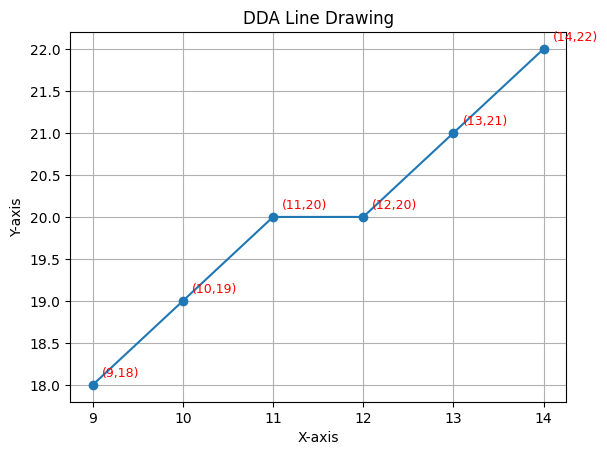

In [7]:
import matplotlib.pyplot as plt

def draw_line_DDA(x1, y1, x2, y2):
    points = []
    dx = x2 - x1
    dy = y2 - y1
    steps = max(abs(dx), abs(dy))
    x_increment = dx / steps
    y_increment = dy / steps
    x, y = x1, y1
    for _ in range(int(steps) + 1):  # include last point
        points.append((round(x), round(y)))
        x += x_increment
        y += y_increment
    return points

def plot_line(points, title):
    x_values, y_values = zip(*points)
    plt.plot(x_values, y_values, marker='o')
    # Annotate each point
    for (x, y) in points:
        plt.text(x + 0.1, y + 0.1, f"({x},{y})", fontsize=9, color='red')
    plt.title(title)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.grid(True)
    plt.show()

# User input
try:
    x1 = int(input("Enter x1: "))
    y1 = int(input("Enter y1: "))
    x2 = int(input("Enter x2: "))
    y2 = int(input("Enter y2: "))
    dda_points = draw_line_DDA(x1, y1, x2, y2)
    plot_line(dda_points, 'DDA Line Drawing')
except ValueError:
    print("Please enter valid integer coordinates.")


2.Bresenham’s Line Drawing Algorithm.

Enter starting point (x1 y1): 9 18
Enter ending point (x2 y2): 14 22


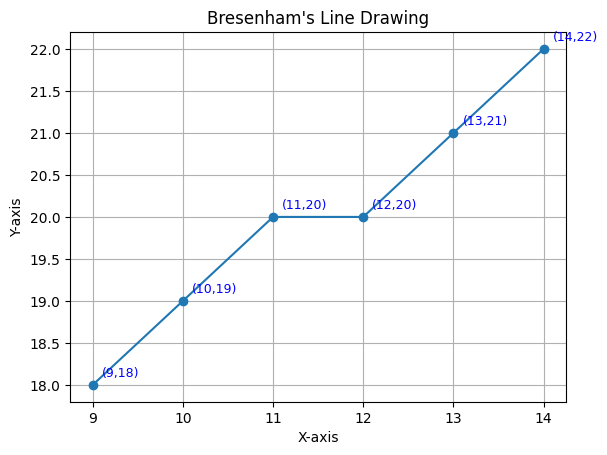

In [9]:
import matplotlib.pyplot as plt

def bresenham_line(x1, y1, x2, y2):
    points = []
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)

    sx = 1 if x1 < x2 else -1
    sy = 1 if y1 < y2 else -1

    err = dx - dy

    while True:
        points.append((x1, y1))
        if x1 == x2 and y1 == y2:
            break
        e2 = 2 * err
        if e2 > -dy:
            err -= dy
            x1 += sx
        if e2 < dx:
            err += dx
            y1 += sy
    return points

def show_line(points, title="Bresenham's Line Drawing"):
    x_vals = [p[0] for p in points]
    y_vals = [p[1] for p in points]

    plt.plot(x_vals, y_vals, marker='o')
    for (x, y) in points:
        plt.text(x + 0.1, y + 0.1, f"({x},{y})", fontsize=9, color='blue')

    plt.title(title)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.grid(True)
    plt.show()

# Main Program
if __name__ == "__main__":
    try:
        x1, y1 = map(int, input("Enter starting point (x1 y1): ").split())
        x2, y2 = map(int, input("Enter ending point (x2 y2): ").split())
        line_points = bresenham_line(x1, y1, x2, y2)
        show_line(line_points)
    except ValueError:
        print("Please enter valid integer values for coordinates.")


3.Midpoint Line Drawing Algorithm.

Enter x1 y1: 9 18
Enter x2 y2: 14 22


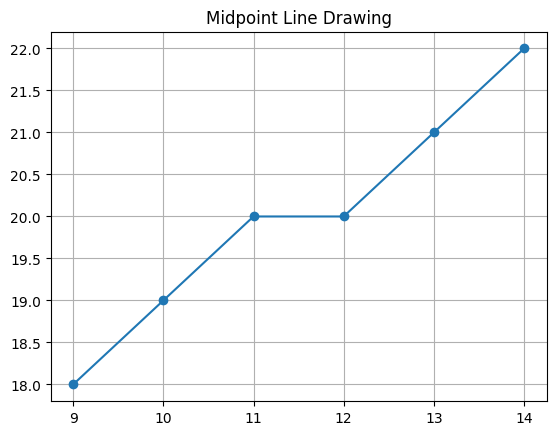

In [10]:
import matplotlib.pyplot as plt

def midpoint_line(x1, y1, x2, y2):
    points = []
    dx, dy = abs(x2-x1), abs(y2-y1)
    sx, sy = (1 if x1<x2 else -1), (1 if y1<y2 else -1)
    if dx > dy:   # slope <= 1
        d = 2*dy - dx
        for _ in range(dx+1):
            points.append((x1, y1))
            if d >= 0: y1 += sy; d -= 2*dx
            x1 += sx; d += 2*dy
    else:         # slope > 1
        d = 2*dx - dy
        for _ in range(dy+1):
            points.append((x1, y1))
            if d >= 0: x1 += sx; d -= 2*dy
            y1 += sy; d += 2*dx
    return points

# --- Run program ---
x1, y1 = map(int, input("Enter x1 y1: ").replace(",", " ").split())
x2, y2 = map(int, input("Enter x2 y2: ").replace(",", " ").split())
pts = midpoint_line(x1, y1, x2, y2)

xv, yv = zip(*pts)
plt.plot(xv, yv, marker='o'); plt.grid(True)
plt.title("Midpoint Line Drawing")
plt.show()


4.Brasenham's Circle Drawing Algorithm

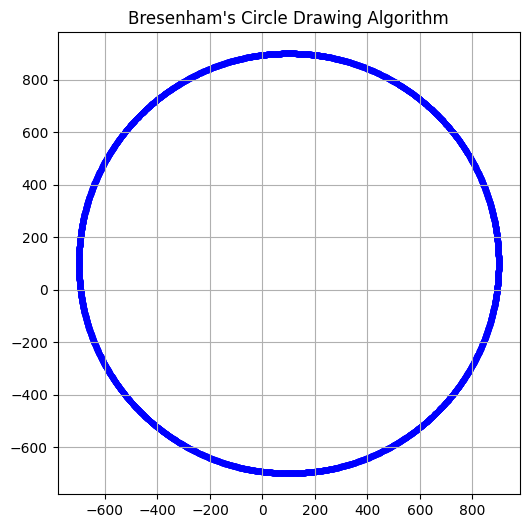

In [11]:
import matplotlib.pyplot as plt

def plot_circle_points(xc, yc, x, y, points):
    # Using 8-way symmetry
    points.extend([
        (xc + x, yc + y),
        (xc - x, yc + y),
        (xc + x, yc - y),
        (xc - x, yc - y),
        (xc + y, yc + x),
        (xc - y, yc + x),
        (xc + y, yc - x),
        (xc - y, yc - x),
    ])

def bresenham_circle(xc, yc, r):
    x = 0
    y = r
    d = 3 - 2 * r
    points = []

    while x <= y:
        plot_circle_points(xc, yc, x, y, points)
        if d < 0:
            d += 4 * x + 6
        else:
            d += 4 * (x - y) + 10
            y -= 1
        x += 1

    return points


xc, yc, r = 100, 100, 800


circle_points = bresenham_circle(xc, yc, r)


x_coords, y_coords = zip(*circle_points)

plt.figure(figsize=(6, 6))
plt.scatter(x_coords, y_coords, color='blue', s=10)
plt.title("Bresenham's Circle Drawing Algorithm")
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()


5.Midpoint Circle Drawing Algorithm.

Enter circle center (xc yc): 50 50 
Enter radius r: 20


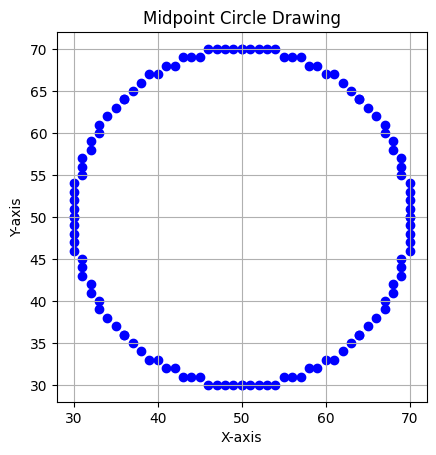

In [12]:
import matplotlib.pyplot as plt

def midpoint_circle(xc, yc, r):
    x, y = 0, r
    d = 1 - r
    points = []

    while x <= y:
        # 8-way symmetry
        points.extend([
            (xc + x, yc + y), (xc - x, yc + y),
            (xc + x, yc - y), (xc - x, yc - y),
            (xc + y, yc + x), (xc - y, yc + x),
            (xc + y, yc - x), (xc - y, yc - x)
        ])
        if d < 0:
            d += 2*x + 3
        else:
            d += 2*(x - y) + 5
            y -= 1
        x += 1
    return points

def show_circle(points, title="Midpoint Circle Drawing"):
    x_vals = [p[0] for p in points]
    y_vals = [p[1] for p in points]

    plt.scatter(x_vals, y_vals, c="blue", marker="o")
    plt.gca().set_aspect("equal")  # make circle round
    plt.title(title)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.grid(True)
    plt.show()

# --- Main Program ---
if __name__ == "__main__":
    try:
        xc, yc = map(int, input("Enter circle center (xc yc): ").replace(",", " ").split())
        r = int(input("Enter radius r: "))
        circle_points = midpoint_circle(xc, yc, r)
        show_circle(circle_points)
    except ValueError:
        print("Please enter valid integer values for coordinates.")


6.2D rotation.

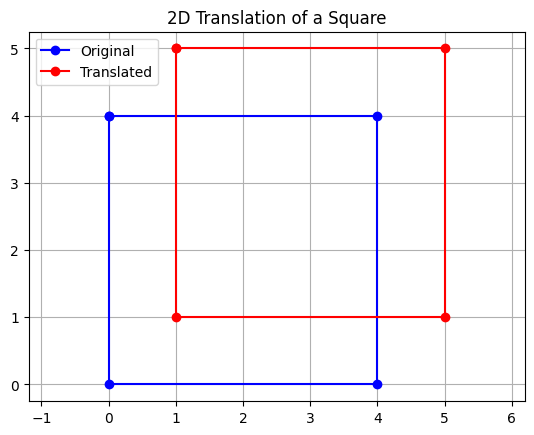

Translated coordinates: [(1, 5), (5, 5), (5, 1), (1, 1)]


In [14]:
import matplotlib.pyplot as plt

# Original square
points = [(0,4),(4,4),(4,0),(0,0)]
tx, ty = 1, 1  # translation

# Apply translation
translated = [(x+tx, y+ty) for x,y in points]

# Close the shapes
ox, oy = zip(*(points+[points[0]]))
nx, ny = zip(*(translated+[translated[0]]))

# Plot
plt.plot(ox, oy, 'b-o', label="Original")
plt.plot(nx, ny, 'r-o', label="Translated")
plt.legend(); plt.axis("equal"); plt.grid(True)
plt.title("2D Translation of a Square")
plt.show()

# Print new coordinates
print("Translated coordinates:", translated)


7.2D Scaling

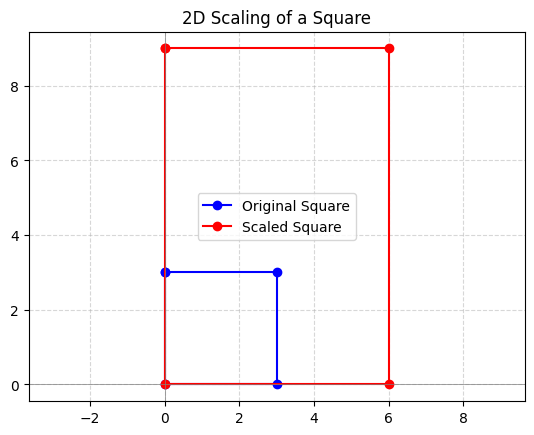

New coordinates after scaling: [(0, 9), (6, 9), (6, 0), (0, 0)]


In [15]:
import matplotlib.pyplot as plt

# Original square coordinates
square = [(0, 3), (3, 3), (3, 0), (0, 0)]

# Scaling factors
sx, sy = 2, 3

# Apply scaling
scaled_square = [(x * sx, y * sy) for x, y in square]

# Close the shapes for plotting
orig_x, orig_y = zip(*(square + [square[0]]))
scale_x, scale_y = zip(*(scaled_square + [scaled_square[0]]))

# Plot
plt.plot(orig_x, orig_y, 'b-o', label='Original Square')
plt.plot(scale_x, scale_y, 'r-o', label='Scaled Square')
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.title('2D Scaling of a Square')
plt.axis('equal')
plt.show()

# Print new coordinates
print("New coordinates after scaling:", scaled_square)


8.2D Rotation

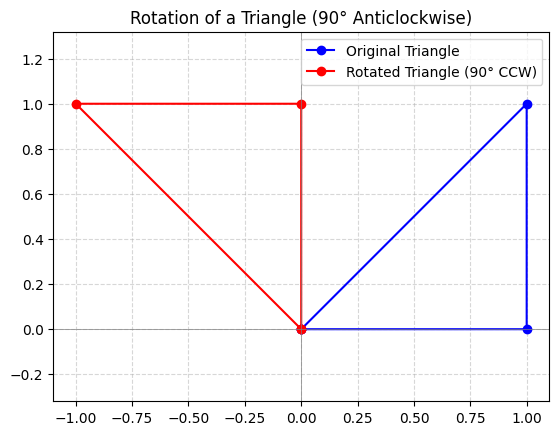

New coordinates after rotation: [(0, 0), (0, 1), (-1, 1)]


In [18]:
import matplotlib.pyplot as plt

# Original triangle coordinates
triangle = [(0, 0), (1, 0), (1, 1)]

# Rotation function 90° anticlockwise
def rotate_90_ccw(points):
    return [(-y, x) for x, y in points]

# Apply rotation
rotated = rotate_90_ccw(triangle)

# Close shapes for plotting
orig_x, orig_y = zip(*(triangle + [triangle[0]]))
rot_x, rot_y = zip(*(rotated + [rotated[0]]))

# Plot
plt.plot(orig_x, orig_y, 'b-o', label='Original Triangle')
plt.plot(rot_x, rot_y, 'r-o', label='Rotated Triangle (90° CCW)')
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.title('Rotation of a Triangle (90° Anticlockwise)')
plt.axis('equal')
plt.show()

# Print new coordinates
print("New coordinates after rotation:", rotated)


9.2D Reflection


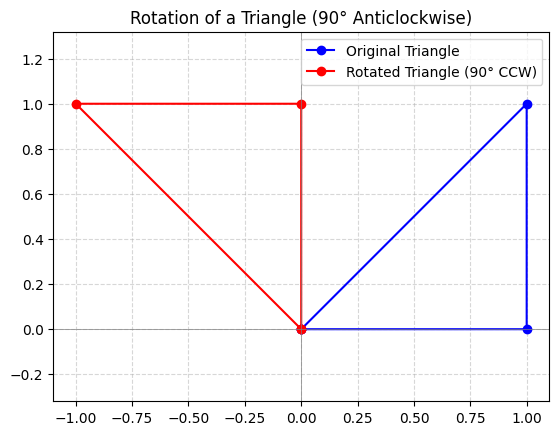

New coordinates after rotation: [(0, 0), (0, 1), (-1, 1)]


In [19]:
import matplotlib.pyplot as plt

# Original triangle coordinates
triangle = [(0, 0), (1, 0), (1, 1)]

# Rotation 90° anticlockwise function
def rotate_90_ccw(points):
    return [(-y, x) for x, y in points]

# Apply rotation
rotated = rotate_90_ccw(triangle)

# Close shapes for plotting
orig_x, orig_y = zip(*(triangle + [triangle[0]]))
rot_x, rot_y = zip(*(rotated + [rotated[0]]))

# Plot
plt.plot(orig_x, orig_y, 'b-o', label='Original Triangle')
plt.plot(rot_x, rot_y, 'r-o', label='Rotated Triangle (90° CCW)')
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.title('Rotation of a Triangle (90° Anticlockwise)')
plt.axis('equal')
plt.show()

# Print new coordinates
print("New coordinates after rotation:", rotated)


10.2D Shearing.

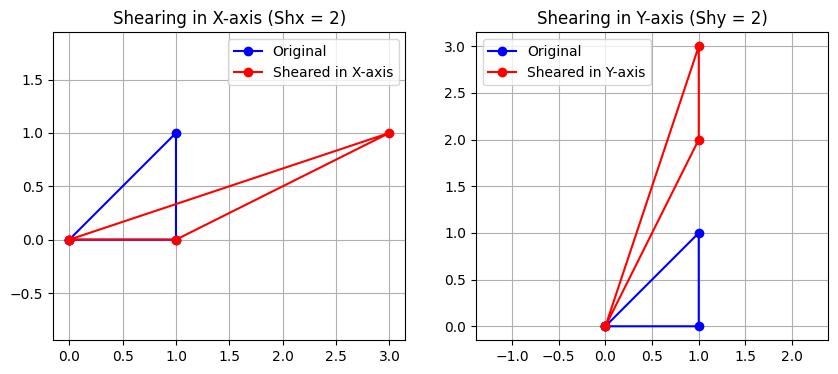

Shearing in X-axis:
A' = (3, 1)
B' = (1, 0)
O' = (0, 0)

Shearing in Y-axis:
A' = (1, 3)
B' = (1, 2)
O' = (0, 0)


In [20]:
import matplotlib.pyplot as plt
# Original triangle coordinates
O = (0, 0)
B = (1, 0)
A = (1, 1)
# Shearing in X-axis (Shx = 2)
Shx = 2
A_x = (A[0] + Shx * A[1], A[1])
B_x = (B[0] + Shx * B[1], B[1])
O_x = (O[0] + Shx * O[1], O[1])
# Shearing in Y-axis (Shy = 2)
Shy = 2
A_y = (A[0], A[1] + Shy * A[0])
B_y = (B[0], B[1] + Shy * B[0])
O_y = (O[0], O[1] + Shy * O[0])
# Plot for X-axis Shearing
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
# Original
plt.plot([O[0], B[0], A[0], O[0]], [O[1], B[1], A[1], O[1]], 'bo-', label='Original')
# Sheared
plt.plot([O_x[0], B_x[0], A_x[0], O_x[0]], [O_x[1], B_x[1], A_x[1], O_x[1]], 'ro-',
label='Sheared in X-axis')
plt.title("Shearing in X-axis (Shx = 2)")
plt.axis('equal')
plt.grid(True)
plt.legend()
# Plot for Y-axis Shearing
plt.subplot(1, 2, 2)
# Original
plt.plot([O[0], B[0], A[0], O[0]], [O[1], B[1], A[1], O[1]], 'bo-', label='Original')
# Sheared
plt.plot([O_y[0], B_y[0], A_y[0], O_y[0]], [O_y[1], B_y[1], A_y[1], O_y[1]], 'ro-',
label='Sheared in Y-axis')
plt.title("Shearing in Y-axis (Shy = 2)")
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()
# Print new coordinates
print("Shearing in X-axis:")
print(f"A' = {A_x}")
print(f"B' = {B_x}")
print(f"O' = {O_x}")
print("\nShearing in Y-axis:")
print(f"A' = {A_y}")
print(f"B' = {B_y}")
print(f"O' = {O_y}")